# Lab 7 - Malware classificaction with Deep Learning
Sergio Marchena

UVG

In [37]:
import os
import pandas as pd
import numpy as np
import random
from IPython.display import display, Image

## Desarrollo

### 1. En el preprocesamiento debe mostrar cuantos ejemplares hay por cada familia. En base a estos datos debe determinar si considera pertinente prescindir de ejemplares que tengan pocas observaciones. 

In [29]:
Adalier = next(os.walk('malimg_paper_dataset_imgs/Adialer.C'))[2]
Agent = next(os.walk('malimg_paper_dataset_imgs/Agent.FYI'))[2]
Allaple = next(os.walk('malimg_paper_dataset_imgs/Allaple.A'))[2]
AllapleL = next(os.walk('malimg_paper_dataset_imgs/Allaple.L'))[2]
Alueron = next(os.walk('malimg_paper_dataset_imgs/Alueron.gen!J'))[2]
Autorun = next(os.walk('malimg_paper_dataset_imgs/Autorun.K'))[2]
C2LOP1 = next(os.walk('malimg_paper_dataset_imgs/C2LOP.gen!g'))[2]
C2LOP2 = next(os.walk('malimg_paper_dataset_imgs/C2LOP.P'))[2]
Dialplatform = next(os.walk('malimg_paper_dataset_imgs/Dialplatform.B'))[2]
Dontovo = next(os.walk('malimg_paper_dataset_imgs/Dontovo.A'))[2]
Fakerean = next(os.walk('malimg_paper_dataset_imgs/Fakerean'))[2]
Instantaccess = next(os.walk('malimg_paper_dataset_imgs/Instantaccess'))[2]
LolydaAA1 = next(os.walk('malimg_paper_dataset_imgs/Lolyda.AA1'))[2]
LolydaAA2 = next(os.walk('malimg_paper_dataset_imgs/Lolyda.AA2'))[2]
LolydaAA3 = next(os.walk('malimg_paper_dataset_imgs/Lolyda.AA3'))[2]
LolydaAT = next(os.walk('malimg_paper_dataset_imgs/Lolyda.AT'))[2]
Malex = next(os.walk('malimg_paper_dataset_imgs/Malex.gen!J'))[2]
Obfuscator = next(os.walk('malimg_paper_dataset_imgs/Obfuscator.AD'))[2]
Rbot = next(os.walk('malimg_paper_dataset_imgs/Rbot!gen'))[2]
Skintrim = next(os.walk('malimg_paper_dataset_imgs/Skintrim.N'))[2]
SwizzorE = next(os.walk('malimg_paper_dataset_imgs/Swizzor.gen!E'))[2]
SwizzorI = next(os.walk('malimg_paper_dataset_imgs/Swizzor.gen!I'))[2]
VB = next(os.walk('malimg_paper_dataset_imgs/VB.AT'))[2]
Wintrim = next(os.walk('malimg_paper_dataset_imgs/Wintrim.BX'))[2]
Yuner = next(os.walk('malimg_paper_dataset_imgs/Yuner.A'))[2]

print('Adalier.C: ', len(Adalier))
print('Agent.FYI: ', len(Agent))
print('Allaple.A: ',  len(Agent))
print('Allaple.L: ', len(AllapleL))
print('Alueron.gen!J: ', len(Alueron))
print('Autorun.K: ', len(Autorun))
print('C2LOP.P: ', len(C2LOP2))
print('Dialplatform.B: ', len(Dialplatform))
print('Dontovo.A: ', len(Dontovo))
print('Fakerean: ', len(Fakerean))
print('Instantaccess: ', len(Instantaccess))
print('LolydaAA1: ', len(LolydaAA1))
print('LolydaAA2: ', len(LolydaAA1))
print('LolydaAA3: ', len(LolydaAA1))
print('LolydaAT: ', len(LolydaAT))
print('Malex: ', len(Malex))
print('Obfuscator: ', len(Obfuscator))
print('Rbot: ', len(Rbot))
print('Skintrim: ', len(Skintrim))
print('SwizzorE: ', len(SwizzorE))
print('SwizzorI: ', len(SwizzorI))
print('VB.AT: ', len(VB))
print('Wintrim: ', len(Wintrim))
print('Yuner: ', len(Yuner))

Adalier.C:  122
Agent.FYI:  116
Allaple.A:  116
Allaple.L:  1591
Alueron.gen!J:  198
Autorun.K:  106
C2LOP.P:  146
Dialplatform.B:  177
Dontovo.A:  162
Fakerean:  381
Instantaccess:  431
LolydaAA1:  213
LolydaAA2:  213
LolydaAA3:  213
LolydaAT:  159
Malex:  136
Obfuscator:  142
Rbot:  158
Skintrim:  80
SwizzorE:  128
SwizzorI:  132
VB.AT:  408
Wintrim:  97
Yuner:  800


Se tomaran en cuenta solo las familias con mas de 198 ejemplares: Allaple.L, Alueron.gen!J, Fakerean, Instantaccess, LolydaAA1, LolydaAA2, LolydaAA3, VB.AT y Yuner

### 2. Plotee las imágenes de los ejemplares de malware. 

malimg_paper_dataset_imgs/Allaple.A/03dd0b54e0496883d1405038293fe20a.png


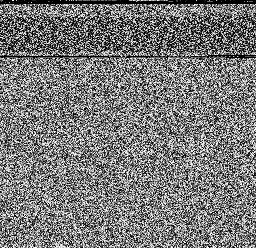

In [47]:
# Allaple.L

img = random.choice(Allaple)
dir = 'malimg_paper_dataset_imgs/Allaple.A/' + img
print(dir)
display(Image(filename=dir))

malimg_paper_dataset_imgs/Alueron.gen!J/03a0a9b3ae33df763347d6263ce6cbf2.png


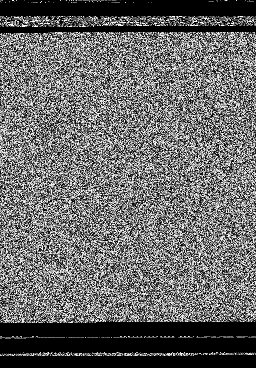

In [49]:
# Alueron.gen!J

img = random.choice(Alueron)
dir = 'malimg_paper_dataset_imgs/Alueron.gen!J/' + img
print(dir)
display(Image(filename=dir))

malimg_paper_dataset_imgs/Fakerean/065891ef36eaa9690c32a6694949e93b.png


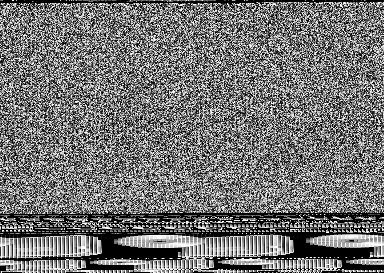

In [50]:
# Fakerean

img = random.choice(Fakerean)
dir = 'malimg_paper_dataset_imgs/Fakerean/' + img
print(dir)
display(Image(filename=dir))

malimg_paper_dataset_imgs/Instantaccess/0015ed29065c163bc94bea4924e179ec.png


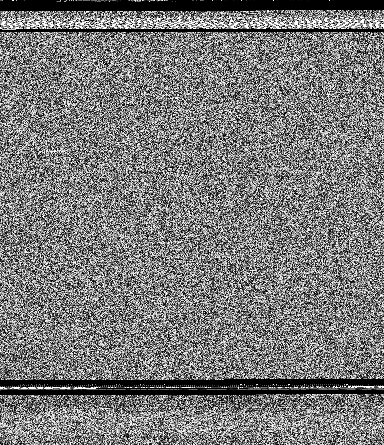

In [51]:
# Instantaccess

img = random.choice(Instantaccess)
dir = 'malimg_paper_dataset_imgs/Instantaccess/' + img
print(dir)
display(Image(filename=dir))

malimg_paper_dataset_imgs/Lolyda.AA1/008971de563ea0feb7e9e2e4d7390bf8.png


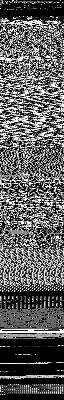

In [53]:
# LolydaAA1

img = random.choice(LolydaAA1)
dir = 'malimg_paper_dataset_imgs/Lolyda.AA1/' + img
print(dir)
display(Image(filename=dir))

malimg_paper_dataset_imgs/Lolyda.AA2/00be16afe596aa0d62a2e21a6545dd78.png


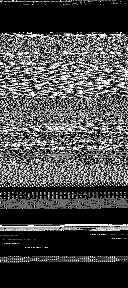

In [54]:
# LolydaAA2

img = random.choice(LolydaAA2)
dir = 'malimg_paper_dataset_imgs/Lolyda.AA2/' + img
print(dir)
display(Image(filename=dir))

malimg_paper_dataset_imgs/Lolyda.AA3/0074d9cbef77f558dc761662089de8e2.png


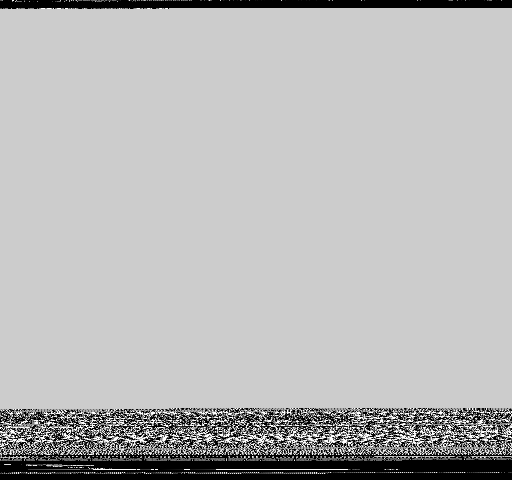

In [55]:
# LolydaAA3

img = random.choice(LolydaAA3)
dir = 'malimg_paper_dataset_imgs/Lolyda.AA3/' + img
print(dir)
display(Image(filename=dir))

malimg_paper_dataset_imgs/VB.AT/0143ea36712bcb46d1a55d0613cda60c.png


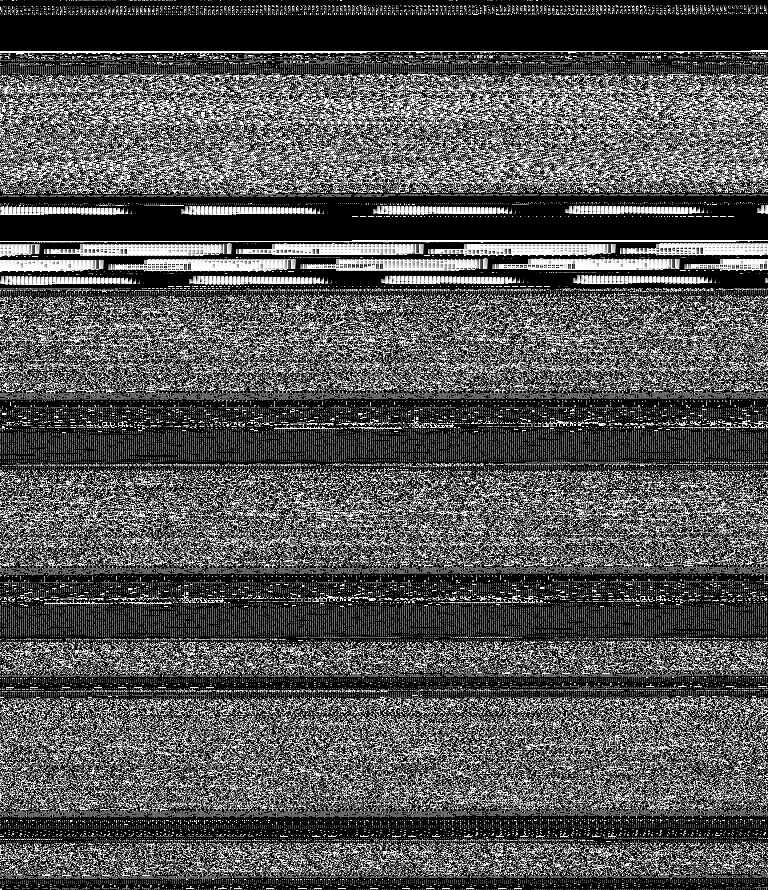

In [56]:
# VB.AT

img = random.choice(VB)
dir = 'malimg_paper_dataset_imgs/VB.AT/' + img
print(dir)
display(Image(filename=dir))

malimg_paper_dataset_imgs/Yuner.A/053a1400e86eb67eeacc100c2a37d323.png


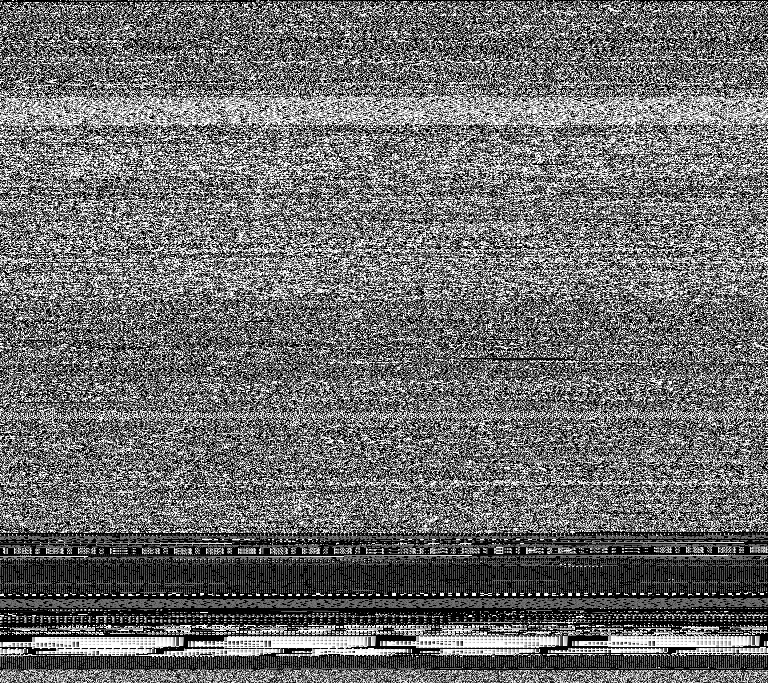

In [59]:
# Yuner.A

img = random.choice(Yuner)
dir = 'malimg_paper_dataset_imgs/Yuner.A/' + img
print(dir)
display(Image(filename=dir))

### 3. Utilizando  Keras  y  Tensorflow  construya  una  red  neuronal  con  las  capas,  funciones  de activación y el optimizador que considere conveniente.

In [60]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'